# 머신러닝

### 1) 선형회귀


In [27]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv('./data/LinearRegressionData.csv')
df.head(3)

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14


In [18]:
#x 대문지 : 원인이 되는 요소들이 많다
X= df.iloc[:,:-1]
X

,hour
0,0.5
1,1.2
2,1.8
3,2.4
4,2.6
5,3.2
6,3.9
7,4.4
8,4.5
9,5.0


In [17]:
y = df.iloc[:,-1]
y

0      10
1       8
2      14
3      26
4      22
5      30
6      42
7      48
8      38
9      58
10     60
11     72
12     62
13     68
14     72
15     58
16     76
17     86
18     90
19    100
Name: score, dtype: int64

In [29]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [23]:
from sklearn.linear_model import LinearRegression

In [30]:
reg= LinearRegression()
reg.fit(X,y)

LinearRegression()

In [31]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [32]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

In [33]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

### 2)선형회귀 시각화

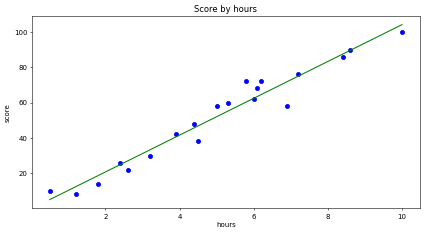

In [36]:
plt.figure(figsize=(10,5),dpi=50)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [39]:
reg.predict([[9],[8],[1]])

array([93.77478776, 83.33109082, 10.22521224])

In [42]:
#기울기
m=reg.coef_
m

array([10.44369694])

In [43]:
#절편
b = reg.intercept_
b

-0.218484702867201

In [44]:
#선형 회귀 모델(y=mx + b)
y = m*9+b
y

array([93.77478776])

### 3) 데이터 세트 분리

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('./data/LinearRegressionData.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
#len(X) 20
len(X_train) #16
len(X_test)  #4

4

In [59]:
#len(y) 20
len(y_train) #16
len(y_test)  #4

4

In [60]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [61]:
X_train

array([[5.3],
       [8.4],
       [3.9],
       [6.1],
       [2.6],
       [1.8],
       [3.2],
       [6.2],
       [5. ],
       [4.4],
       [7.2],
       [5.8],
       [2.4],
       [0.5],
       [6.9],
       [6. ]])

In [62]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

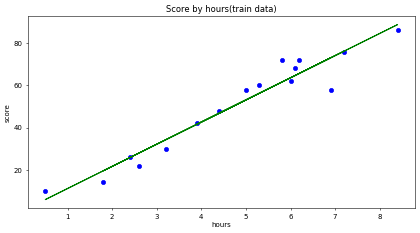

In [63]:
# train값들과 reg로 예측한 그래프
plt.figure(figsize=(10,5),dpi=50)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

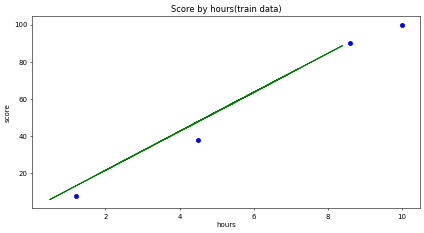

In [65]:
#test값들과 train으로 reg로 예측한 그래프
plt.figure(figsize=(10,5),dpi=50)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [69]:
#모델 예측 평가 점수
#일반적으로 train점수가 높다
#데이터가 적어서 test점수가 높게나오는 듯
reg.score(X_train,y_train)
reg.score(X_test,y_test)

0.9727616474310156

### 4) 경사하강법

In [77]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor()
sr.fit(X_train,y_train)

SGDRegressor()

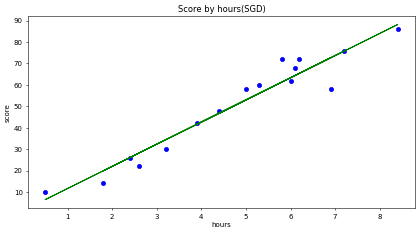

In [73]:
# train값들과 예측그래프
plt.figure(figsize=(10,5),dpi=50)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [78]:
sr.score(X_train, y_train)

0.934591993170777

In [80]:
sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

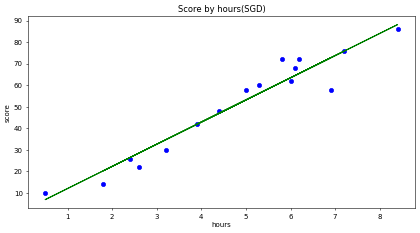

In [81]:
# train값들과 예측그래프
plt.figure(figsize=(10,5),dpi=50)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


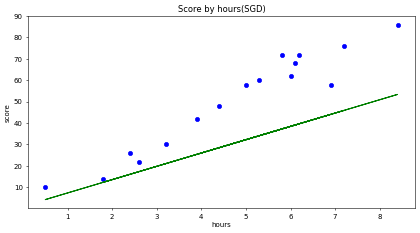

In [83]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=100, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train) ##학습률이 적어지만 학습 반복횟수는 늘어난다.
plt.figure(figsize=(10,5),dpi=50)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df= pd.read_csv("./data/LinearRegressionData.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [3]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [4]:
reg.predict([[9]])

array([93.77478776])